# Single File (Decay) Analysis and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Create Data

In [2]:
def decay_fn(x, a, tau, c):
    """Mono-exponential decay function."""
    return a * np.exp(-x / tau) + c

<IPython.core.display.Javascript object>


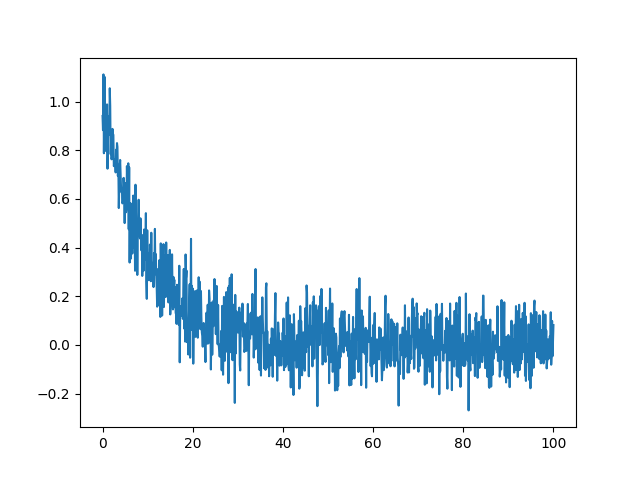

In [7]:
tau = 10          # Lifetime in ms

x = np.linspace(0, 10*tau, num=1000)
y = decay_fn(x, 1, tau, 0)

# Add noise to signal. Std of 4
y+= np.random.normal(0, 0.1, 1000)

plt.figure()
plt.plot(x, y)

# Using Library

In [10]:
import lifetime.decay as lm

<IPython.core.display.Javascript object>


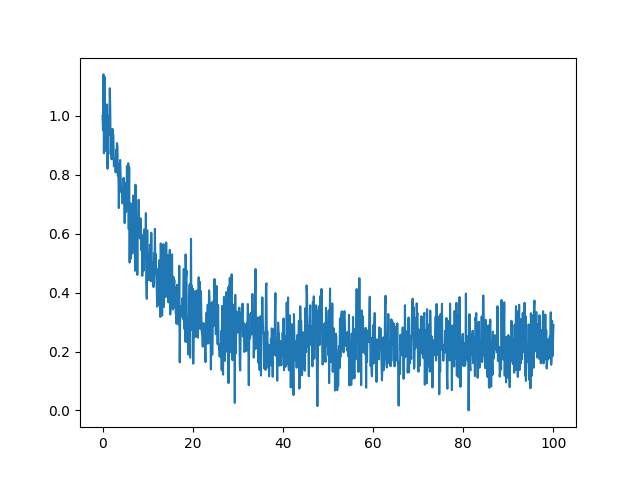

In [11]:
x, y = lm.prepare_data(x,y)

plt.figure()
plt.plot(x, y)

In [20]:
%timeit lm.fit_decay(x, y)

1000 loops, best of 3: 777 µs per loop


In [21]:
%timeit lm.minimize_fit(x, y)

Optimization terminated successfully.
         Current function value: 6.213596
         Iterations: 216
         Function evaluations: 394
[  0.82793267  10.00661888   0.22289215]
Optimization terminated successfully.
         Current function value: 6.213596
         Iterations: 216
         Function evaluations: 394
[  0.82793267  10.00661888   0.22289215]
Optimization terminated successfully.
         Current function value: 6.213596
         Iterations: 216
         Function evaluations: 394
[  0.82793267  10.00661888   0.22289215]
Optimization terminated successfully.
         Current function value: 6.213596
         Iterations: 216
         Function evaluations: 394
[  0.82793267  10.00661888   0.22289215]
Optimization terminated successfully.
         Current function value: 6.213596
         Iterations: 216
         Function evaluations: 394
[  0.82793267  10.00661888   0.22289215]
Optimization terminated successfully.
         Current function value: 6.213596
         Iterat